<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## 1 - replicate lesson code

In [0]:
from IPython.display import display,Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url,width=400)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
data = "https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv"
IS = pd.read_csv(data)
IS = IS[['1_votes','2_votes','3_votes','4_votes','5_votes','6_votes','7_votes','8_votes','9_votes','10_votes']]
#IS.head(10)

In [5]:
vote_sums = list(IS.sum())
vote_sums = np.asarray(vote_sums)
vote_sums = 100* vote_sums/np.sum(vote_sums)
vote_sums

array([39.52868337,  2.86622861,  1.73444454,  0.79618132,  1.93303466,
        3.33215825,  4.6685369 ,  4.45058633,  5.59400773, 35.0961383 ])

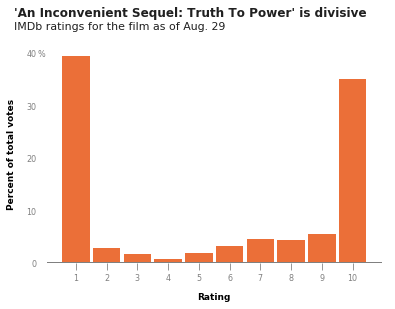

In [6]:
fig,ax = plt.subplots()
fig.patch.set(facecolor='white')
fig.patch.set_alpha(0)
ax.set(facecolor='white')
ax.patch.set_alpha(0)

plt.style.use('fivethirtyeight');
ax.bar(range(1,11),vote_sums,color='#eb6f38',width=.9,bottom=0);

ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11),{'color':'grey','size':8})
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10),{'color':'grey','size':8})

ax.tick_params(size=7,color='grey',grid_color='grey',left=False)
ax.set_xlabel('Rating',fontsize=9,fontweight='bold',labelpad=10)
ax.set_ylabel('Percent of total votes',fontsize=9,fontweight='bold',labelpad=10)
ax.text(x=-1, y=47, s="'An Inconvenient Sequel: Truth To Power' is divisive",fontweight='bold', fontsize=12,color='#202020');
ax.text(x=-1, y=44.5, s="IMDb ratings for the film as of Aug. 29", fontsize=11,color='#202020')
ax.text(x=-0.25, y=39.4, s='%',fontsize=8,color='grey')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.axhline(color='grey',lw=2)  # horizontal line had dissapeared


plt.show()

In [7]:
display(example)

## 2 -- Another example

In [8]:
marriage_data = "https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/both_sexes.csv"
marriage = pd.read_csv(marriage_data)
marriage.head()

,Unnamed: 0,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,Black_2534,Hisp_2534,NE_2534,MA_2534,Midwest_2534,South_2534,Mountain_2534,Pacific_2534,poor_2534,mid_2534,rich_2534,all_3544,HS_3544,SC_3544,BAp_3544,BAo_3544,GD_3544,White_3544,Black_3544,Hisp_3544,NE_3544,MA_3544,Midwest_3544,South_3544,Mountain_3544,Pacific_3544,poor_3544,mid_3544,rich_3544,all_4554,HS_4554,SC_4554,BAp_4554,BAo_4554,GD_4554,White_4554,Black_4554,Hisp_4554,NE_4554,MA_4554,Midwest_4554,South_4554,Mountain_4554,Pacific_4554,poor_4554,mid_4554,rich_4554,nokids_all_2534,kids_all_2534,nokids_HS_2534,nokids_SC_2534,nokids_BAp_2534,nokids_BAo_2534,nokids_GD_2534,kids_HS_2534,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
0,1,1960,1960-01-01,0.123314,0.109533,0.152282,0.238995,0.238995,NaN,0.116485,0.162186,0.139374,0.150418,0.162893,0.112147,0.109056,0.091521,0.119876,0.137160,0.075149,0.206678,0.070582,0.068603,0.066637,0.132626,0.132626,NaN,0.068256,0.088367,0.073077,0.091943,0.093475,0.068634,0.060264,0.047397,0.058225,0.101975,0.047173,0.085539,0.072546,0.068408,0.079038,0.153609,0.153609,NaN,0.072467,0.069132,0.066361,0.102364,0.092648,0.072853,0.059773,0.047542,0.059970,0.103006,0.053644,0.079086,0.464056,0.002821,0.443015,0.500040,0.561910,0.561910,NaN,0.003319,0.001151,0.000575,0.000575,NaN,0.493306,0.410008,0.492118,0.008723,0.000753,0.000803
1,2,1970,1970-01-01,0.126971,0.109400,0.149510,0.218703,0.218703,NaN,0.117904,0.185516,0.129877,0.151723,0.164068,0.115374,0.112622,0.102936,0.137496,0.171720,0.081592,0.172409,0.067325,0.065120,0.062717,0.111690,0.111690,NaN,0.062504,0.102909,0.070705,0.085701,0.090407,0.061563,0.059661,0.046512,0.063478,0.111755,0.045668,0.064992,0.059688,0.058334,0.054435,0.104660,0.104660,NaN,0.057548,0.078992,0.058107,0.080281,0.078606,0.057912,0.051745,0.039701,0.048263,0.101649,0.042216,0.051429,0.430904,0.009869,0.424678,0.433348,0.455477,0.455477,NaN,0.012466,0.003700,0.001468,0.001468,NaN,0.509774,0.376454,0.428895,0.029975,0.003377,0.003044
2,3,1980,1980-01-01,0.199177,0.161731,0.223692,0.288165,0.288165,NaN,0.182413,0.313750,0.188544,0.241433,0.250593,0.182834,0.168844,0.174342,0.233428,0.310059,0.148253,0.185108,0.068834,0.064291,0.065313,0.105610,0.105610,NaN,0.059667,0.131401,0.081108,0.079973,0.097444,0.060706,0.059141,0.048801,0.075525,0.129143,0.050503,0.044460,0.052509,0.050366,0.048162,0.086238,0.086238,NaN,0.047654,0.086246,0.065230,0.069303,0.075085,0.048073,0.044853,0.033744,0.049590,0.100301,0.038303,0.033113,0.446430,0.025286,0.431934,0.450590,0.471970,0.471970,NaN,0.031931,0.018135,0.006254,0.006254,NaN,0.574040,0.399825,0.384809,0.077926,0.010237,0.006832
3,4,1990,1990-01-01,0.296831,0.277749,0.278091,0.361297,0.365665,0.347451,0.263926,0.483856,0.296237,0.350038,0.362332,0.275505,0.263979,0.252643,0.331958,0.419911,0.243200,0.278323,0.111918,0.112100,0.096994,0.128517,0.125857,0.132802,0.096113,0.220103,0.121942,0.127859,0.143550,0.101576,0.096370,0.091899,0.131346,0.201221,0.090247,0.065739,0.059478,0.059882,0.046541,0.073019,0.064165,0.083949,0.050926,0.116177,0.076136,0.070475,0.083731,0.053984,0.050436,0.044594,0.064619,0.114833,0.045623,0.031364,0.542524,0.060277,0.546488,0.523845,0.556076,0.563330,0.533263,0.078470,0.052033,0.017124,0.018177,0.013742,0.654691,0.518660,0.475016,0.170764,0.027466,0.018233
4,5,2000,2000-01-01,0.345009,0.331655,0.324921,0.387491,0.393958,0.369174,0.312715,0.514499,0.318068,0.409185,0.417557,0.330802,0.309971,0.306210,0.375306,0.503368,0.302020,0.271739,0.156059,0.169937,0.138004,0.154124,0.153630,0.155097,0.132070,0.302394,0.154695,0.173274,0.188193,0.145392,0.142306,0.135842,0.174800,0.281314,0.128158,0.086220,0.088044,0.094428,0.075588,0.092084,0.090975,0.093628,0.075782,0.175873,0.094180,0.102322,0.112697,0.083024,0.076319,0.076378,0.098968,0.171898,0.070557,0.038973,0.571453,0.099473,0.571139,0.570004,0.572968,0.586221,0.536716,0.12719

In [9]:
marriage = marriage[['year','HS_2534','SC_2534','BAp_2534','HS_3544','SC_3544','BAp_3544']]
marriage = marriage.iloc[2:,:] # drop data below the 1980's
marriage = marriage - marriage.min() # Make everything start at same value (interested in relative changes, not absolute values)
marriage.head()

,year,HS_2534,SC_2534,BAp_2534,HS_3544,SC_3544,BAp_3544
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10.0,0.116018,0.054400,0.073132,0.047809,0.031680,0.022907
4,20.0,0.169923,0.101229,0.099326,0.105646,0.072691,0.048514
5,21.0,0.182876,0.110419,0.095404,0.104411,0.074547,0.049205
6,22.0,0.187305,0.112468,0.089268,0.105345,0.080203,0.053666


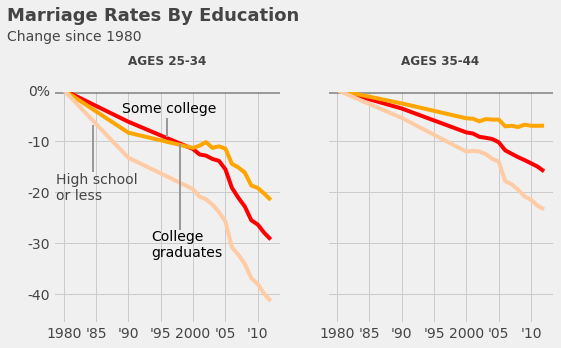

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xticks(range(0,35,5))
ax1.set_xticklabels(['1980',"'85","'90","'95",'2000',"'05","'10"],color='#444444')
ax2.set_xticks(range(0,35,5))
ax2.set_xticklabels(['1980',"'85","'90","'95",'2000',"'05","'10"],color='#444444')

ax1.set_yticks(np.linspace(0,.35,5))
ax1.set_yticklabels(['0%','-10','-20','-30','-40'],color='#444444')
ax2.set_yticks(np.linspace(0,.35,5))
ax2.set_yticklabels(['','','','',''])

ax1.set_ylim([0,.40])
ax2.set_ylim([0,.40])
ax1.axhline(y=0.005,color='grey',lw=1.5)
ax2.axhline(y=.005,color='grey',lw=1.5)
ax1.invert_yaxis(),ax2.invert_yaxis()



ax1.plot(marriage.year,marriage.SC_2534,color='red')
ax1.plot(marriage.year,marriage.BAp_2534,color='orange')
ax1.plot(marriage.year,marriage.HS_2534,color='#ffcba4')

ax2.plot(marriage.year,marriage.SC_3544,color='red')
ax2.plot(marriage.year,marriage.BAp_3544,color='orange')
ax2.plot(marriage.year,marriage.HS_3544,color='#ffcba4')

ax1.set_title('AGES 25-34',size=12,fontweight='bold',pad=25,color='#444444')
ax2.set_title('AGES 35-44',size=12,fontweight='bold',pad=25,color='#444444')

fig.text(0,1.12,s="Marriage Rates By Education",fontsize=18,fontweight='bold',color='#444444')
fig.text(0,1.05,s='Change since 1980',color='#444444')

fig.text(.25,.3,s="College\ngraduates")
ax1.axvline(x=4.5,ymin=.65,ymax=.85,lw=2,color='#999999')
fig.text(.2,.8,s='Some college')
ax1.axvline(x=16,ymin=.8,ymax=.88,lw=2,color='#999999')
fig.text(.085,.5,s='High school\nor less',color='#444444')
ax1.axvline(x=18,ymin=.4,ymax=.77,lw=2,color='#999999')

fig.show()

In [11]:
url2 = "https://fivethirtyeight.com/wp-content/uploads/2014/09/casselman-feature-marriage-2.png"
example2 = Image(url=url2,width=500)
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

## 1 -- thanksgiving 2015

In [14]:
!pip install geopandas

     |████████████████████████████████| 901kB 2.9MB/s 
     |████████████████████████████████| 17.9MB 40.2MB/s 
     |████████████████████████████████| 9.8MB 27.9MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=a5994c5e9464b51aeb44eb3718e7f8178c8095678bfb210d502aba57b6c26203
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [17]:
!wget "https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv"

--2019-09-12 04:54:40--  https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385447 (376K) [text/plain]
Saving to: ‘thanksgiving-2015-poll-data.csv’

thanksgiving-2015-p 100%[===================>] 376.41K  --.-KB/s    in 0.05s   

2019-09-12 04:54:40 (7.43 MB/s) - ‘thanksgiving-2015-poll-data.csv’ saved [385447/385447]



In [133]:
import geopandas as gpd

data3 = "thanksgiving-2015-poll-data.csv"

tg = gpd.read_file(data3)
tg_region = tg.iloc[:,61]
tg = tg.iloc[:,11:24] # columns 11- 24 are the side dishes, 61 is the us region

def get_food(string):
  string = string.split('-')[1].strip().title()
  return string

tg.columns = tg.columns.to_series().apply(get_food) # simplify column names
tg['region'] = tg_region # add region back at end
tg = tg.replace('',np.nan) #fillna
tg.head()

,Brussel Sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit Salad,Green Beans/Green Bean Casserole,Macaroni And Cheese,Mashed Potatoes,Rolls/Biscuits,Squash,Vegetable Salad,Yams/Sweet Potato Casserole,region
0,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole,Middle Atlantic
1,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,East South Central
2,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN,Mountain
3,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole,Pacific
4,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Pacific


In [141]:
regions = list(tg.region.unique())
food_cols = tg.columns[:-1]
for food in food_cols:
  popular_food = tg.groupby('region')[food].value_counts().sort_values(ascending=False) # sort for highest
  print(popular_food.index[0],popular_food[0]) # returns tuple (region, food) nd the count

# TO BE CONTINUED
# TO DO:
# next steps: find max value for region. remove region from "regions" list and food from "food_cols" list, keep remaining columns then re do loop

('Middle Atlantic', 'Brussel sprouts') 41
('South Atlantic', 'Carrots') 48
('Middle Atlantic', 'Cauliflower') 25
('South Atlantic', 'Corn') 96
('South Atlantic', 'Cornbread') 53
('South Atlantic', 'Fruit salad') 39
('South Atlantic', 'Green beans/green bean casserole') 150
('South Atlantic', 'Macaroni and cheese') 79
('South Atlantic', 'Mashed potatoes') 157
('South Atlantic', 'Rolls/biscuits') 158
('Middle Atlantic', 'Squash') 44
('South Atlantic', 'Vegetable salad') 39
('South Atlantic', 'Yams/sweet potato casserole') 144


In [12]:
url3 = "https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png"
example3 = Image(url=url3,width=500)
display(example3)